## Q20 直方图显示
直方图显示了不同数值的像素出现的次数

*　一般来说直方图都是针对灰度图的

> * 图像直方图的两个基本属性：range[0，255]和bins(组块)
> * 直方图无空间信息
> * 中间灰度级像素多，动态范围(可变化信号（例如声音或光）最大值和最小值的比值)小，图像对比度低
> * 直方图均匀分布时图像最清晰


### opencv函数
```
hist = cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) 
```

* images参数表示输入图像，传入时应该用中括号[ ]括起来
* channels参数表示传入图像的通道，如果是灰度图像，那就不用说了，只有一个通道，值为0，如果是彩色图像（有3个通道），那么值为0,1,2,中选择一个，对应着BGR各个通道。这个值也得用[ ]传入。
* mask参数表示掩膜图像。如果统计整幅图，那么为None。主要是如果要统计部分图的直方图，就得构造相应的掩膜来计算。
* histSize参数表示灰度级的个数，需要中括号，比如[256]
* ranges参数表示像素值的范围，通常[0,256]。此外，假如channels为[0,1],ranges为[0,256,0,180],则代表0通道范围是0-256,1通道范围0-180。
* hist参数表示计算出来的直方图。


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

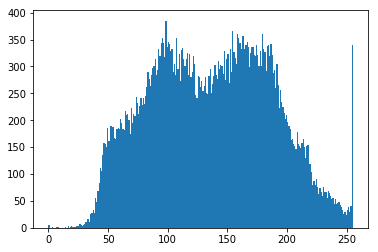

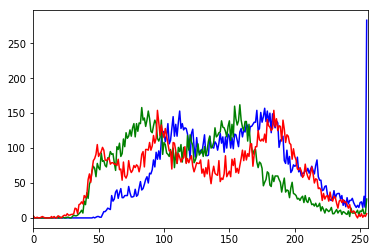

In [3]:
img = cv2.imread("gg.jpg")

# 使用plt
plt.figure()
# .ravel()：array类型对象的方法，ravel函数将多维数组降为一维，仍返回array数组，元素以列排列。
plt.hist(img.ravel(), bins=255, rwidth=1, range=(0, 255))
plt.show()

# 使用opencv
color = ["blue", "green", "red"]  #画笔颜色的值可以为大写或小写或只写首字母或大小写混合
for i, color in enumerate(color):
   hist = cv2.calcHist([img], [i], None, [256], [0, 256])
   plt.plot(hist, color = color)
   plt.xlim([0, 256])
plt.show()


## Q21  直方图归一化（ Histogram Normalization ）

```
中文	             English	                  日本語	                具体作用
直方图匹配（规定化）	Histogram Matching ( Specification )	ヒストグラムマッチング	       将两张图像的累积分布函数调为一样
直方图均衡化	      Histogram Equalization	          ヒストグラム均等化（平坦化）	拉开灰度差别，增强对比度
直方图归一化	      Histogram Normalization	          ヒストグラム正規化	         将直方图所有分量限制在一定范围
```


有时直方图会存在偏差。比如说，数据集中在 0 处（左侧）的图像全体会偏暗，数据集中在255 处（右侧）的图像会偏亮。
如果直方图有所偏向，那么其动态范围（ dynamic range ）就会较低
为了使人能更清楚地看见图片，让直方图归一化、平坦化是十分必要的

这种归一化直方图的操作被称作灰度变换（Grayscale Transformation）。
像素点取值范围从 [c,d] 转换到 [a,b] 的过程由下式定义

```
xout = {  a                         (xin < c)
         (b-a) * (xin-c) /(d-c)   + a  (c <= xin <= d)
          b                         (d < xin)

```

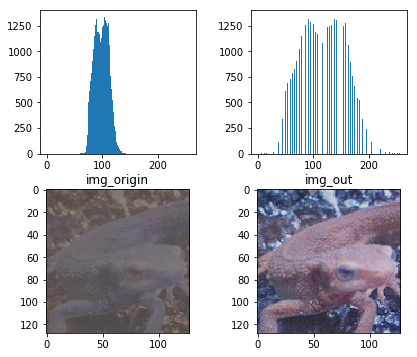

In [28]:
img = cv2.imread("gg_dark.jpg")
img_origin = img .copy()

c = img.min()
d = img.max()

# 需要转换的像素最大值与最小值
a = 0
b = 255

img_out = ((b - a) * ((img - c)/(d - c))  + a).astype(np.uint8)
img_out[img_out < a] = a
img_out[img_out > b] = b

# print(img_out)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(221)
plt.hist(img.ravel(), bins=255, rwidth=1, range=(0, 255))
plt.subplot(222)
plt.hist(img_out.ravel(), bins=255, rwidth=1, range=(0, 255))
plt.subplot(223)
plt.imshow(img_origin)
plt.title("img_origin")
plt.subplot(224)
plt.imshow(img_out)
plt.title("img_out")

# Adjust the subplot layout, because the logit one may take more space
plt.subplots_adjust(top=1.2, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.show()

## Q22 直方图操作

* 改变直方图的均值与标准差

让直方图的平均值m0=128，标准差s0=52

这里并不是变更直方图的动态范围，而是让直方图变得平坦

可以使用下式将平均值为m标准差为s的直方图变成平均值为m0标准差为s0的直方图：

$$ x_{out} = s_{0} / s * (xin - m) + m_{0}$$

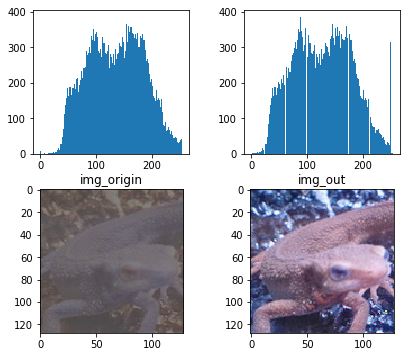

In [33]:
img = cv2.imread("gg.jpg")

(H, W, C) = img.shape

m_0 = 128
s_0 = 52

m = np.mean(img)
s = np.std(img)


# 操作之后一定要将数据转为无符号8位格式  astype(np.uint8)
img_out = (s_0 / s * (img - m) + m_0).astype(np.uint8)
img_out[img_out < 0]   = 0
img_out[img_out > 255] = 255

# 方便plt显示
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(221)
plt.hist(img.ravel(), bins=255, rwidth=1, range=(0, 255))
plt.subplot(222)
plt.hist(img_out.ravel(), bins=255, rwidth=1, range=(0, 255))
plt.subplot(223)
plt.imshow(img_origin)
plt.title("img_origin")
plt.subplot(224)
plt.imshow(img_out)
plt.title("img_out")
plt.subplots_adjust(top=1.2, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()


### error

```
# 操作之后一定要将数据转为无符号8位格式  astype(np.uint8)
img_out = (s_0 / s * (img - m) + m_0).astype(np.int8)
```

``` python
---------------------------------------------------------------------------
error                                     Traceback (most recent call last)
<ipython-input-31-877f4e9dc2e8> in <module>
     16 
     17 img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
---> 18 img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
     19 
     20 plt.figure()

error: OpenCV(4.1.0) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 1 (CV_8S)

```

## Q23 直方图均衡化（ Histogram Equalization ）

直方图均衡化是使直方图变得平坦的操作，是不需要计算上面的问题中的平均值、标准差等数据使直方图的值变得均衡的操作。

均衡化操作由以下式子定义。S是总的像素数；Zmax是像素点的最大取值（在这里是 255）；h(z)表示取值为z的累积分布函数：

$$ Z' = Z_{max} / S * Sum_{i=0:z} h(z) $$


### opencv 函数

```
dst = cv2.equalizeHist(gray)
```


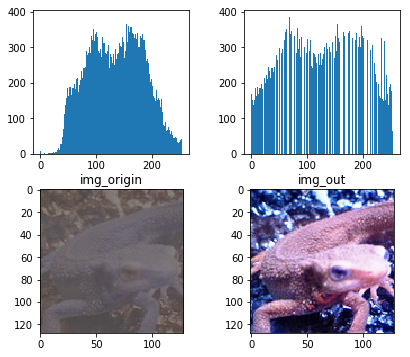

In [35]:
img = cv2.imread("gg.jpg")

(H, W, C) = img.shape
S  = H * W * C * 1.

img_out = img.copy()

z_max = 255.
sum_h = 0.

for i in range(1, 255):
    ind = np.where(img == i)
    sum_h += len(img[ind])
    z_prime = z_max / S * sum_h
    img_out[ind] = z_prime
    
img_out = img_out.astype(np.uint8)


# 方便plt显示
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(221)
plt.hist(img.ravel(), bins=255, rwidth=1, range=(0, 255))
plt.subplot(222)
plt.hist(img_out.ravel(), bins=255, rwidth=1, range=(0, 255))
plt.subplot(223)
plt.imshow(img_origin)
plt.title("img_origin")
plt.subplot(224)
plt.imshow(img_out)
plt.title("img_out")
plt.subplots_adjust(top=1.2, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()